In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Leaves/Data/train'
valid_path = 'Leaves/Data/validation'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:

for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('Leaves/Data/train/*')

In [6]:
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Leaves/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Leaves/Data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 1907 images belonging to 32 classes.
Found 376 images belonging to 32 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
60/60 [==============================] - 700s 11s/step - loss: 2.2906 - accuracy: 0.4997 - val_loss: 0.2343 - val_accuracy: 0.9362
Epoch 2/5
60/60 [==============================] - 691s 11s/step - loss: 0.2014 - accuracy: 0.9466 - val_loss: 0.0709 - val_accuracy: 0.9894
Epoch 3/5
60/60 [==============================] - 663s 11s/step - loss: 0.0883 - accuracy: 0.9757 - val_loss: 0.0532 - val_accuracy: 0.9840
Epoch 4/5
60/60 [==============================] - 646s 11s/step - loss: 0.1051 - accuracy: 0.9752 - val_loss: 0.0835 - val_accuracy: 0.9761
Epoch 5/5
60/60 [==============================] - 653s 11s/step - loss: 0.0614 - accuracy: 0.9848 - val_loss: 0.0237 - val_accuracy: 0.9947


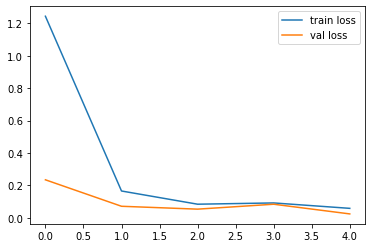

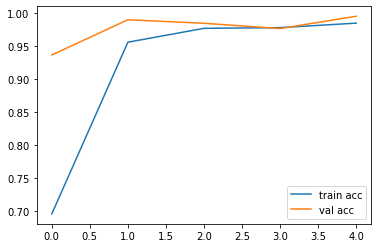

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
import numpy as np

#from google.colab import files
from keras.preprocessing import image

#uploaded=files.upload()

#for fn in uploaded.keys():
 
  # predicting images
path='/Users/glipne/Desktop/Python/AI:ML/Leaf_recognition/samples/2554.jpg'
img=image.load_img(path, target_size=(224,224))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images)
for cls in training_set.class_indices:
    print(cls+ " : "+str(classes[0][training_set.class_indices[cls]]))
    

Anhui Barberry : 0.0
Beale's Barberry : 0.0
Big-fruited Holly : 0.0
Canadian popler : 0.0
Caster aralia : 0.0
Champhortree : 0.0
Chinese Redbud : 0.0
Chinese cinnamon : 0.0
Chinese horse chestnut : 0.0
Chinese toon : 0.0
Chinese tulip tree : 0.0
Crape myrtle,crepe myrtle : 0.0
Deodar : 0.0
Ford Woodlotus : 0.033056457
Glossy privet : 0.0
Goldenrain tree : 0.0
Japan Arrowwood : 0.0
Japanese Cheesewood : 0.0
Japanese Flowering Cherry : 0.0
Japanese Maple : 0.0
Nanmu : 0.0
Peach : 0.0
Pubescent bamboo : 0.0
Sweet osmanthus : 0.0
Wintersweet : 0.0
ginkgo, maidenhair tree : 0.0
oleander : 0.9669435
southern magnolia : 2.5020492e-38
tangerine : 0.0
trident maple : 0.0
true indigo : 0.0
yew plum pine : 1.5797363e-34
